<div align="center"><img src="files/data/pwr.png"></div>
<h1>
    <div align="center">
        New trends in neural computing<br>
        <span style="font-weight:normal;"><font size="4">(Nowe trendy w obliczeniach neuronowych)</font></span>
    </div>
</h1>
<h3>
    <b>Project:</b>
</h3>
<p>
    <b>EN:</b> "Detection of network attacks based on query parameters."
</p>
<p>
    <b>PL:</b> "Wykrywanie ataków sieciowych na podstawie parametrów zapytań"
</p>
<h3>
    <b>Author:</b>
</h3>
<p>
    P.Grochowski
</p>

<h2>
    Used packages:
</h2>

In [1]:
import os
import sys
import traceback
import operator
import numpy
import pandas
import matplotlib
import json
import csv
import matplotlib.pyplot as plt

from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras import optimizers
from keras.utils.visualize_util import plot

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14.0, 4.0)

numpy.random.seed(3)

Using Theano backend.
Using gpu device 0: GeForce GTX 950M (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5105)


<h2>
    <b>Used data:</b>
</h2>
<p>
    <b>Dataset source:</b><br>
    <a href="http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html">
    http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html</a><br>
<p>
</p>
    <b>Qute from the page:</b><br>
    "This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment."
</p>

In [2]:
# Get current working directory:
cwd = os.getcwd()

# Set paths:
dataFileLog = "log.txt"
dataFileFull = "data_full.csv"
dataFilePart = "data_part.csv"
dataFileProc = "data_preprocessed.json"
dataFileProcX = "data_preprocessed_x.csv"
dataFileProcY = "data_preprocessed_y.csv"
dataFileDescription = "description.csv"
dataDirName = "data"

In [3]:
# Load data:
filePath = os.path.join( cwd, dataDirName, dataFileFull )
csvData = pandas.read_csv( filePath )

# Display table:
csvData

0  tcp  http  SF  215  45076  0.1  0.2  0.3  0.4   ...     0.17  \
0        0  tcp  http  SF  162   4528    0    0    0    0   ...        1   
1        0  tcp  http  SF  236   1228    0    0    0    0   ...        2   
2        0  tcp  http  SF  233   2032    0    0    0    0   ...        3   
3        0  tcp  http  SF  239    486    0    0    0    0   ...        4   
4        0  tcp  http  SF  238   1282    0    0    0    0   ...        5   
5        0  tcp  http  SF  235   1337    0    0    0    0   ...        6   
6        0  tcp  http  SF  234   1364    0    0    0    0   ...        7   
7        0  tcp  http  SF  239   1295    0    0    0    0   ...        8   
8        0  tcp  http  SF  181   5450    0    0    0    0   ...        9   
9        0  tcp  http  SF  184    124    0    0    0    0   ...       10   
10       0  tcp  http  SF  185   9020    0    0    0    0   ...       11   
11       0  tcp  http  SF  239   1295    0    0    0    0   ...       12   
12       0  tcp  http  SF  181   5450    0    0    0    0   ...       13   
13       0  tcp  http  SF  236   1228    0    0    0    0   ...       14   
14       0  tcp  http  SF  233   2032    0    0    0    0   ...       15   
15       0  tcp  http  SF  238   1282    0    0    0    0   ...       16   
16       0  tcp  http  SF  235   1337    0    0    0    0   ...       17   
17       0  tcp  http  SF  234   1364    0    0    0    0   ...       18   
18       0  tcp  http  SF  239    486    0    0    0    0   ...       19   
19       0  tcp  http  SF  185   9020    0    0    0    0   ...       20   
20       0  tcp  http  SF  184    124    0    0    0    0   ...       21   
21       0  tcp  http  SF  181   5450    0    0    0    0   ...       22   
22       0  tcp  http  SF  239   1295    0    0    0    0   ...       23   
23       0  tcp  http  SF  236   1228    0    0    0    0   ...       24   
24       0  tcp  http  SF  233   2032    0    0    0    0   ...       25   
25       0  tcp  http  SF  239    486    0    0    0    0   ...       26   
26       0  tcp  http  SF  238   1282    0    0    0    0   ...       27   
27       0  tcp  http  SF  234   1364    0    0    0    0   ...       28   
28       0  tcp  http  SF  235   1337    0    0    0    0   ...       29   
29       0  tcp  http  SF  215  45076    0    0    0    0   ...       30   
...     ..  ...   ...  ..  ...    ...  ...  ...  ...  ...   ...      ...   
4898400  0  tcp  http  SF  283    466    0    0    0    0   ...      255   
4898401  0  tcp  http  SF  289   1096    0    0    0    0   ...      255   
4898402  0  tcp  http  SF  289   1862    0    0    0    0   ...      255   
4898403  0  tcp  http  SF  203    242    0    0    0    0   ...      255   
4898404  0  tcp  http  S1  196      0    0    0    0    0   ...      255   
4898405  0  tcp  http  SF  143  17463    0    0    0    0   ...      255   
4898406  0  tcp  http  SF  202   4017    0    0    0    0   ...      255   
4898407  0  tcp  http  SF    0    234    0    0    0    0   ...      255   
4898408  0  tcp  http  SF  203   1200    0    0    0    0   ...      255   
4898409  0  tcp  http  SF  198   2169    0    0    0    0   ...      255   
4898410  0  tcp  http  SF  197    466    0    0    0    0   ...      255   
4898411  0  tcp  http  SF  203   1862    0    0    0    0   ...      255   
4898412  0  tcp  http  SF  203   1096    0    0    0    0   ...      255   
4898413  0  tcp  http  SF  284   2286    0    0    0    0   ...      255   
4898414  0  tcp  http  SF  290   4017    0    0    0    0   ...      255   
4898415  0  tcp  http  SF  291    234    0    0    0    0   ...      255   
4898416  0  tcp  http  SF  291    242    0    0    0    0   ...      255   
4898417  0  tcp  http  SF  231  17463    0    0    0    0   ...      255   
4898418  0  tcp  http  SF  291   1200    0    0    0    0   ...      255   
4898419  0  tcp  http  SF  285    466    0    0    0    0   ...      255   
4898420  0  tcp  http  SF  286   2169    0    0    0    0

<h2>
    Column descriptions:
</h2>

In [4]:
# Get description:
filePath = os.path.join( cwd, dataDirName, dataFileDescription )
csvDesc = pandas.read_csv( filePath )

# Display table:
csvDesc

Column   Data type  \
0                      duration  continuous   
1                 protocol_type    symbolic   
2                       service    symbolic   
3                          flag    symbolic   
4                     src_bytes  continuous   
5                     dst_bytes  continuous   
6                          land    symbolic   
7                wrong_fragment  continuous   
8                        urgent  continuous   
9                           hot  continuous   
10            num_failed_logins  continuous   
11                    logged_in    symbolic   
12              num_compromised  continuous   
13                   root_shell  continuous   
14                 su_attempted  continuous   
15                     num_root  continuous   
16           num_file_creations  continuous   
17                   num_shells  continuous   
18             num_access_files  continuous   
19            num_outbound_cmds  continuous   
20                is_host_login    symbolic   
21               is_guest_login    symbolic   
22                        count  continuous   
23                    srv_count  continuous   
24                  serror_rate  continuous   
25              srv_serror_rate  continuous   
26                  rerror_rate  continuous   
27              srv_rerror_rate  continuous   
28                same_srv_rate  continuous   
29                diff_srv_rate  continuous   
30           srv_diff_host_rate  continuous   
31               dst_host_count  continuous   
32           dst_host_srv_count  continuous   
33       dst_host_same_srv_rate  continuous   
34       dst_host_diff_srv_rate  continuous   
35  dst_host_same_src_port_rate  continuous   
36  dst_host_srv_diff_host_rate  continuous   
37         dst_host_serror_rate  continuous   
38     dst_host_srv_serror_rate  continuous   
39         dst_host_rerror_rate  continuous   
40     dst_host_srv_rerror_rate  continuous   
41        purpose_of_connection    symbolic   

                                          Description  
0       Length (number of seconds) of the connection.  
1           Type of the protocol, e.g. tcp, udp, etc.  
2   Network service on the destination, e.g., http...  
3           Normal or error status of the connection.  
4    Number of data bytes from source to destination.  
5    Number of data bytes from destination to source.  
6   1 if connection is from/to the same host/port;...  
7                        Number of 'wrong' fragments.  
8                           Number of urgent packets.  
9                         Number of 'hot' indicators.  
10                   Number of failed login attempts.  
11           1 if successfully logged in; 0 otherwise  
12                Number of 'compromised' conditions.  
13           1 if root shell is obtained; 0 otherwise  
14      1 if 'su root' command attempted; 0 otherwise  
15                         Number of 'root' accesses.  
16                Number of file creation operations.  
17                           Number of shell prompts.  
18      Number of operations on access control files.  
19     Number of outbound commands in an ftp session.  
20  1 if the login belongs to the 'hot' list; 0 ot...  
21      1 if the login is a 'guest'login; 0 otherwise  
22  Number of connections to the same host as the ...  
23  Number of connections to the same service as t...  
24  Percent of connections that have 'SYN' errors....  
25  Percent of connections that have 'SYN' errors....  
26  Percent of connections that have 'REJ' errors....  
27  Percent of connections that have 'REJ' errors....  
28  Percent of connections to the same service. (R...  
29  Percent of connections to different services. ...  
30  Percent of connections to different hosts. (Re...  
31                                                ---  
32                                                ---  
33                                                ---  
34                                         

<h2>
    Preprocessing:
</h2>

In [3]:
def fileCleanX():
    with open(os.path.join(cwd, dataDirName, dataFileProcX), "w") as f:
        f.write("")

def fileCleanY():
    with open(os.path.join(cwd, dataDirName, dataFileProcY), "w") as f:
        f.write("")

def fileAppendX(row):
    with open(os.path.join(cwd, dataDirName, dataFileProcX), "a") as f:
        writer = csv.writer(f)
        writer.writerow(row)

def fileAppendY(row):
    with open(os.path.join(cwd, dataDirName, dataFileProcY), "a") as f:
        writer = csv.writer(f)
        writer.writerow(row)

def fileLoadX():
    filePath = os.path.join(cwd, dataDirName, dataFileProcX)
    return pandas.read_csv(filePath).as_matrix()

def fileLoadY():
    filePath = os.path.join(cwd, dataDirName, dataFileProcY)
    return pandas.read_csv(filePath).as_matrix()

In [7]:
# Convert data to array:
dataArray = csvData.as_matrix()

In [13]:
# Find symbolic type columns and numeric columns limits:
symbColsMap = {}
numbColsMap = {}

for colIdx, colVal in enumerate(dataArray[0][:-1]):

    # Handle symbolic:
    if isinstance(colVal, str):
        lbls = set(dataArray[:,colIdx].tolist())
        symbColsMap[colIdx] = lbls

    # Handle numeric:
    else:
        valMin = numpy.amin(dataArray[:,colIdx])
        valMax = numpy.amin(dataArray[:,colIdx])
        numbColsMap[colIdx] = (valMin, valMax)

In [16]:
# Prepare X and Y:
fileCleanX()
fileCleanY()

for rowIdx, rowVal in enumerate(dataArray):
    
    # Handle attributes:
    rowNewX = []
    for colIdx, colVal in enumerate(rowVal[:-1]):
        if colIdx in symbColsMap.keys():
            for symb in symbColsMap[colIdx]:
                rowNewX.append(1.0 if colVal == symb else 0.0)
        else:
            valMin = min(numbColsMap[colIdx])
            valMax = max(numbColsMap[colIdx])
            rowNewX.append((colVal-valMin)/(valMax-valMin+numpy.finfo(float).eps))
    fileAppendX(rowNewX)
    
    # Handle classes:
    rowNewY = [
        1.0 if not rowVal[-1].startswith('normal') else 0.0,
        1.0 if rowVal[-1].startswith('normal') else 0.0
    ]
    fileAppendY(rowNewY)

<h2>
    Experiments:
</h2>

In [4]:
def compileModel(model, optimizer='adam', loss='categorical_crossentropy'):
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [5]:
def fit(mdl, x, y, nb_epoch=100, **kwargs):
    oldStdout = sys.stdout
    hist = None
    try:
        with open(os.path.join(cwd, dataDirName, dataFileLog), 'w') as f:
            sys.stdout = f
            hist = mdl.fit(x, y, nb_epoch=nb_epoch, validation_split=0.1, verbose=1, **kwargs)
            
    except:
        traceback.print_exc()
    
    sys.stdout = oldStdout
    
    return hist

In [16]:
def saveModel(mdl, name):
    with open(os.path.join(cwd, dataDirName, "%s.json" % name), "w") as f:
        f.write(mdl.to_json())
    mdl.save_weights(os.path.join(cwd, dataDirName, "%s.h5" % name))

def loadModel(name):
    with open(os.path.join(cwd, dataDirName, "%s.json" % name), "r") as f:
        mdl = keras.models.model_from_json(f.read())
    mdl.load_weights(os.path.join(cwd, dataDirName, "%s.h5" % name))
    return mdl

In [17]:
def visLoss(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    plt.plot(range(len(val_loss)), loss, label='loss')
    plt.plot(range(len(val_loss)), val_loss, label='val_loss')
    plt.legend(loc='best', fontsize=10)
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

    print "[loss] Lowest:", min(loss)
    print "[loss] Last:", loss[-1]
    print "[val_loss] Lowest:", min(val_loss)
    print "[val_loss] Last:", val_loss[-1]

def visAcc(hist):
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']

    plt.plot(range(len(acc)), acc, label='accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='val_accuracy')
    plt.legend(loc='best', fontsize=10)
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()

    print "[acc] Highest:", max(acc)
    print "[acc] Last:", acc[-1]
    print "[val_acc] Highest:", max(val_acc)
    print "[val_acc] Last:", val_acc[-1]

In [7]:
# Load preprocessed:
x = fileLoadX()
y = fileLoadY()

In [8]:
# Display details:
countAttr = len(x[0])
countCls = len(y[0])
print "Attributes count:", countAttr
print "Records count:", len(x)
print "Classes count:", countCls

Attributes count: 122
Records count: 4898429
Classes count: 2


<h3>
    Used MLP's architecture definition:
</h3>

In [9]:
def getModel(**kwargs):
    mdl = Sequential()

    mdl.add(InputLayer((countAttr,), name='Input'))
    
    mdl.add(Dense(60, activation='relu', name='L1', **kwargs))
    mdl.add(Dropout(0.2, name='D1'))

    mdl.add(Dense(30, activation='relu', name='L2', **kwargs))
    mdl.add(Dropout(0.2, name='D2'))

    mdl.add(Dense(15, activation='relu', name='L3', **kwargs))
    mdl.add(Dropout(0.2, name='D3'))

    mdl.add(Dense(countCls, activation='softmax', name='Output'))
    
    return mdl

In [10]:
mdl = getModel()

In [17]:
mdl.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Input (InputLayer)               (None, 122)           0                                            
____________________________________________________________________________________________________
L1 (Dense)                       (None, 60)            7380        Input[0][0]                      
____________________________________________________________________________________________________
D1 (Dropout)                     (None, 60)            0           L1[0][0]                         
____________________________________________________________________________________________________
L2 (Dense)                       (None, 30)            1830        D1[0][0]                         
___________________________________________________________________________________________

In [18]:
plot(mdl, to_file=os.path.join(cwd, dataDirName, "model.png"), show_shapes=True, show_layer_names=True)

<div align="center"><img src="files/data/model.png"></div>

<h3>
    Classic MLP without modifications:
</h3>
<p>
    Optimizer: Adam<br>
    Loss func: categorical crossentropy
</p>

In [10]:
mdl = getModel()

In [11]:
compileModel(mdl, optimizer='adam', loss='categorical_crossentropy')

In [12]:
hist = fit(mdl, x, y)

In [13]:
visLoss(hist)

[loss] Lowest: 2.44159183626
[loss] Last: 2.79619377429
[val_loss] Lowest: 3.81433593128
[val_loss] Last: 6.20610660016


In [14]:
visAcc(hist)

[acc] Highest: 0.848517415788
[acc] Last: 0.826513988839
[val_acc] Highest: 0.763350706246
[val_acc] Last: 0.614960303607


<h3>
    Classic MLP secod approach:
</h3>
<p>
    Optimizer: RMSProp<br>
    Loss func: categorical crossentropy
</p>

In [15]:
mdl = getModel()

In [16]:
optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
compileModel(mdl, optimizer=optimizer, loss='categorical_crossentropy')

In [17]:
hist = fit(mdl, x, y)

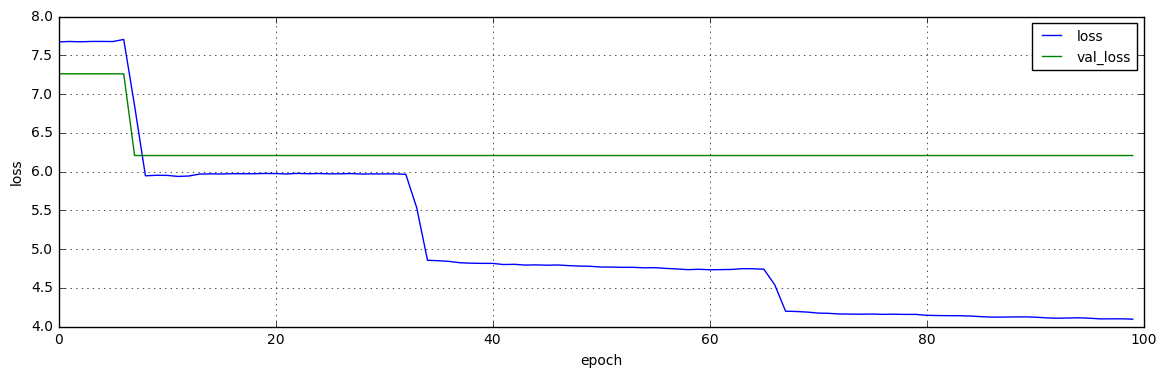

[loss] Lowest: 4.09439230351
[loss] Last: 4.09439230351
[val_loss] Lowest: 6.20610660016
[val_loss] Last: 6.20610660016


In [18]:
visLoss(hist)

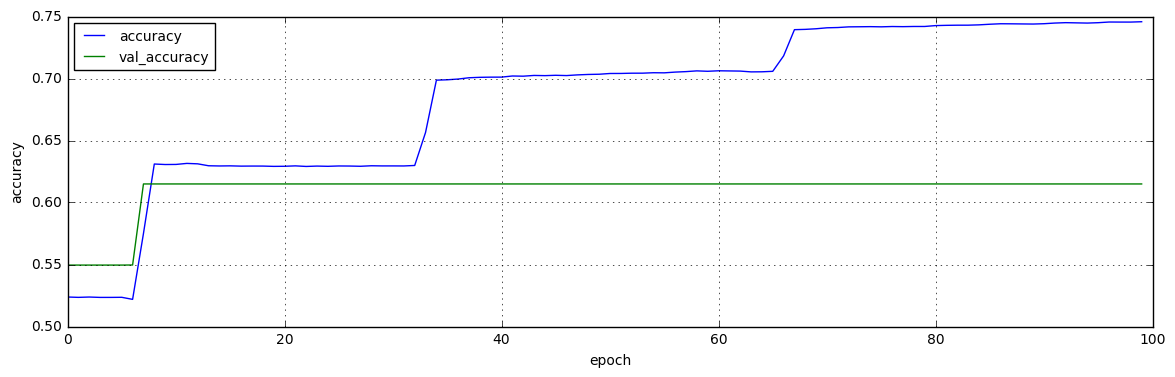

[acc] Highest: 0.74578424919
[acc] Last: 0.74578424919
[val_acc] Highest: 0.614960303607
[val_acc] Last: 0.614960303607


In [19]:
visAcc(hist)

<h3>
    Classic MLP third approach:
</h3>
<p>
    Optimizer: Adam<br>
    Loss func: mean squared error
</p>

In [20]:
mdl = getModel()

In [21]:
compileModel(mdl, optimizer='adam', loss='mean_squared_error')

In [22]:
hist = fit(mdl, x, y)

In [23]:
visLoss(hist)

[loss] Lowest: 0.207049705122
[loss] Last: 0.208672409366
[val_loss] Lowest: 0.207446059248
[val_loss] Last: 0.385039696393


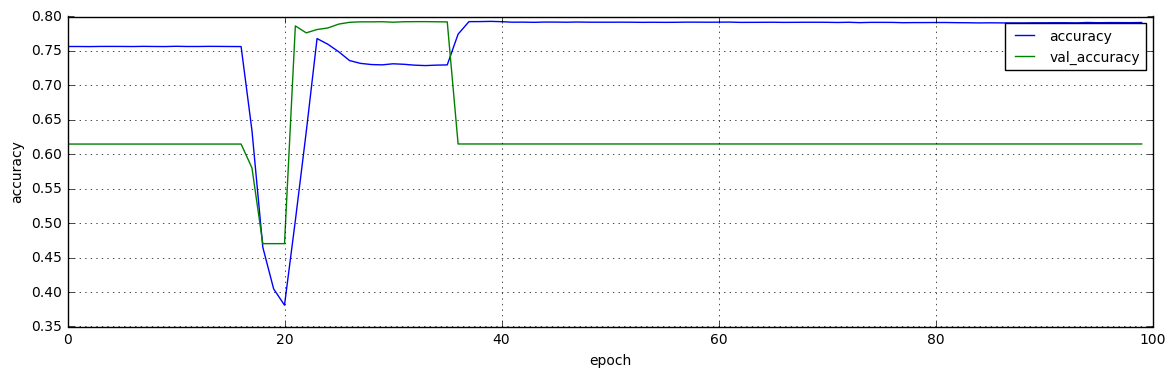

[acc] Highest: 0.792935648754
[acc] Last: 0.791315855016
[val_acc] Highest: 0.792553940752
[val_acc] Last: 0.614960303607


In [24]:
visAcc(hist)

<h3>
    Classic MLP with regularizer L1:
</h3>
<p>
    Optimizer: Adam<br>
    Loss func: categorical crosentropy
</p>

In [32]:
mdl = getModel(W_regularizer=regularizers.l1(0.01))

In [33]:
compileModel(mdl, optimizer='adam', loss='categorical_crossentropy')

In [34]:
hist = fit(mdl, x, y)

In [35]:
visLoss(hist)

[loss] Lowest: 3.66437859826
[loss] Last: 3.9331006746
[val_loss] Lowest: 2.1735779787
[val_loss] Last: 12.0711012193


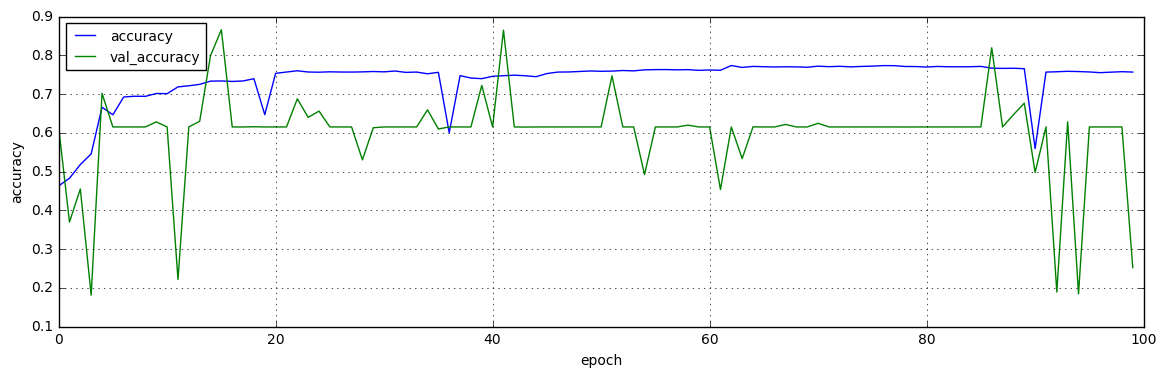

[acc] Highest: 0.773511960524
[acc] Last: 0.75659315708
[val_acc] Highest: 0.865861102435
[val_acc] Last: 0.251762299349


In [36]:
visAcc(hist)

<h3>
    Classic MLP with regularizer L2:
</h3>
<p>
    Optimizer: Adam<br>
    Loss func: categorical crosentropy
</p>

In [37]:
mdl = getModel(W_regularizer=regularizers.l2(0.01))

In [38]:
compileModel(mdl, optimizer='adam', loss='categorical_crossentropy')

In [39]:
hist = fit(mdl, x, y)

In [40]:
visLoss(hist)

[loss] Lowest: 1.56017391102
[loss] Last: 2.18479250997
[val_loss] Lowest: 1.75338292922
[val_loss] Last: 6.20785408231


In [41]:
visAcc(hist)

[acc] Highest: 0.823938333062
[acc] Last: 0.822126641059
[val_acc] Highest: 0.614960303607
[val_acc] Last: 0.614960303607
